# Exploratory Data Analysis Satisfaction

Data indeks kepuasan karyawan di suatu perusahaan

## Problem

- Kepuasan karyawan menjadi faktor yang sangat penting dalam sebuah perusahaan, karena faktor tersebut akan menunjang produktivitas karyawan yang berdampak dalam keberhasilan KPI perusahaan.

## Goals

- Melakukan analisa untuk mendapatkan penyebab / faktor kepuasan dan ketidakpuasan karyawan

### Import Package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("satisfaction.csv")

In [3]:
df.head()

,Unnamed: 0,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1


### Deskripsi Kolom

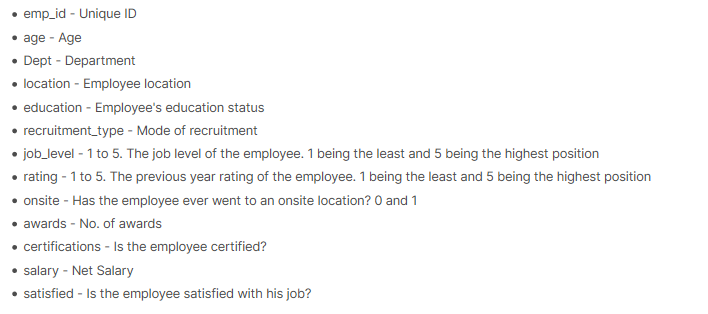

In [4]:
df.shape

(500, 14)

*Terdapat 500 baris dan 14 kolom*

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        500 non-null    int64 
 1   emp_id            500 non-null    object
 2   age               500 non-null    int64 
 3   Dept              500 non-null    object
 4   location          500 non-null    object
 5   education         500 non-null    object
 6   recruitment_type  500 non-null    object
 7   job_level         500 non-null    int64 
 8   rating            500 non-null    int64 
 9   onsite            500 non-null    int64 
 10  awards            500 non-null    int64 
 11  certifications    500 non-null    int64 
 12  salary            500 non-null    int64 
 13  satisfied         500 non-null    int64 
dtypes: int64(9), object(5)
memory usage: 45.0+ KB


## Cek Missing Value

In [6]:
df.isna().sum()

Unnamed: 0          0
emp_id              0
age                 0
Dept                0
location            0
education           0
recruitment_type    0
job_level           0
rating              0
onsite              0
awards              0
certifications      0
salary              0
satisfied           0
dtype: int64

In [7]:
df.isnull().sum()

Unnamed: 0          0
emp_id              0
age                 0
Dept                0
location            0
education           0
recruitment_type    0
job_level           0
rating              0
onsite              0
awards              0
certifications      0
salary              0
satisfied           0
dtype: int64

*Tidak ada missing value dalam data tsb*

## Deskripsi Data

In [8]:
dataDesc = []

for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isnull().sum(),
        round((((df[i].isnull().sum()) / (len(df))) * 100), 2),
        df[i].nunique(),
        df[i].unique()
    ])



In [9]:
pd.DataFrame(dataDesc, columns=[
    'Data Features',
    'Data Types',
    'Null',
    'Null Percentage',
    'Unique',
    'Unique Sample'
] )

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,Unnamed: 0,int64,0,0.0,500,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,emp_id,object,0,0.0,499,"[HR8270, TECH1860, TECH6390, SAL6191, HR6734, ..."
2,age,int64,0,0.0,32,"[28, 50, 43, 44, 33, 40, 26, 25, 35, 45, 31, 4..."
3,Dept,object,0,0.0,5,"[HR, Technology, Sales, Purchasing, Marketing]"
4,location,object,0,0.0,2,"[Suburb, City]"
5,education,object,0,0.0,2,"[PG, UG]"
6,recruitment_type,object,0,0.0,4,"[Referral, Walk-in, On-Campus, Recruitment Age..."
7,job_level,int64,0,0.0,5,"[5, 3, 4, 2, 1]"
8,rating,int64,0,0.0,5,"[2, 5, 1, 3, 4]"
9,onsite,int64,0,0.0,2,"[0, 1]"


## Drop Kolom

- Drop kolom yang dirasa tidak diperlukan
- Unnamed: 0

## Indexing

- Menjadikan kolom "emp_id" sebagai index

## Cek Outliers

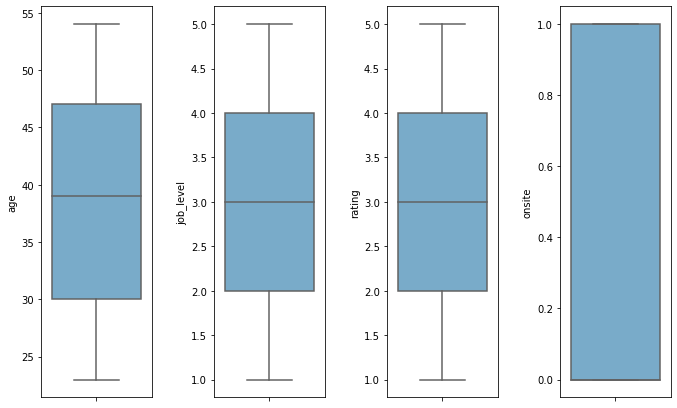

In [36]:
f, axes = plt.subplots(1, 4, figsize = (10,6.5))
f.tight_layout(pad=2.8)
sns.boxplot(y= df["age"],       orient ="v",ax=axes[0],palette = "Blues_r")
sns.boxplot(y= df["job_level"], orient ="v",ax=axes[1],palette = "Blues_r")
sns.boxplot(y= df["rating"],    orient ="v",ax=axes[2],palette = "Blues_r")
sns.boxplot(y= df["onsite"],    orient ="v",ax=axes[3],palette = "Blues_r")
plt.show()

- Tidak ada outliers dalam kolom age, job_level, rating dan onsite

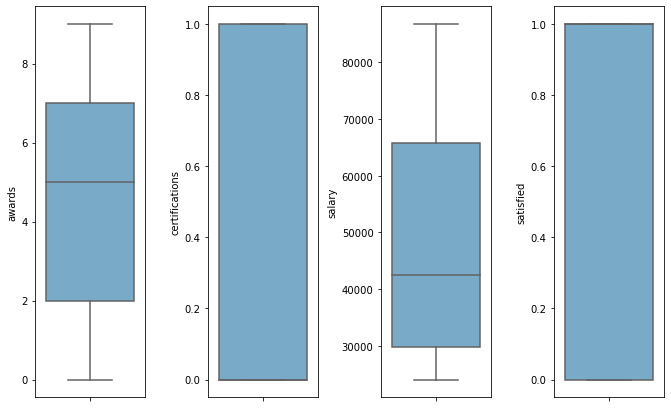

In [37]:
f, axes = plt.subplots(1, 4, figsize = (10,6.5))
f.tight_layout(pad=2.8)
sns.boxplot(y= df["awards"], orient ="v", ax=axes[0], palette = "Blues_r")
sns.boxplot(y= df["certifications"], orient ="v", ax=axes[1], palette = "Blues_r")
sns.boxplot(y= df["salary"], orient ="v", ax=axes[2], palette = "Blues_r")
sns.boxplot(y= df["satisfied"], orient ="v", ax=axes[3], palette = "Blues_r")
plt.show()

- Tidak ada outliers dalam kolom awards, certifications, salary dan satisfied
- Sehingga keseluruhan tidak ada data yang outliers

## Cek Duplikasi Data

In [13]:
print(df.duplicated().value_counts())

False    500
dtype: int64


- Tidak ada data duplikat
- Data sudah bersih

## Analisa Data

In [4]:
satisfied_pr = df["satisfied"].value_counts(normalize = True)*100

In [5]:
satisfied_pr

1    52.6
0    47.4
Name: satisfied, dtype: float64

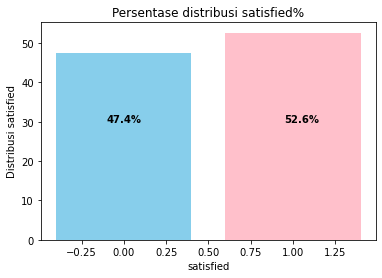

In [6]:
xo = satisfied_pr.index
yo = satisfied_pr.values
plt.figure(figsize=(6,4))
plt.bar(xo, yo,
        color=["pink","skyblue"])

plt.xlabel("satisfied")
plt.ylabel("Distribusi satisfied") 
plt.title("Persentase distribusi satisfied%")
plt.text(0.95, 30, "52.6%", color="black",fontweight="bold")
plt.text(-0.1, 30, "47.4%", color="black",fontweight="bold")

plt.show()

- **Distribusi diatas menunjukan bahwa index kepuasan karyaawan di perusahaan hanya mencapai 52.6%**
- **Artinya hampir setengah karyawan merasa tidak puas bekerja di perusahaan tsb**

<AxesSubplot:>

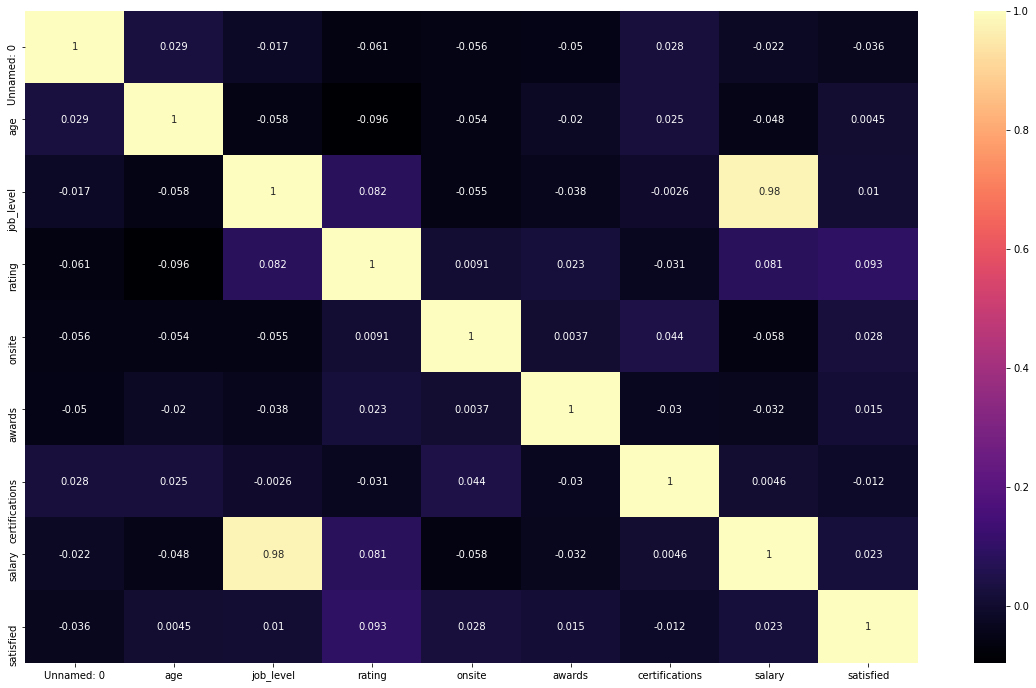

In [10]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True, cmap='magma')

In [11]:
satisfied_0 = df[df["satisfied"] == 0]

In [17]:
satisfied_0

,Unnamed: 0,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
1,1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
6,6,PUR1466,26,Purchasing,Suburb,UG,Referral,5,5,0,2,0,86750,0
7,7,TECH5426,25,Technology,City,UG,Recruitment Agency,1,1,0,4,0,24076,0
9,9,TECH9322,45,Technology,City,PG,Referral,3,3,0,9,0,42419,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,491,TECH5729,23,Technology,City,PG,On-Campus,3,1,0,7,0,42419,0
493,493,MKT6334,41,Marketing,City,UG,Walk-in,5,4,0,2,0,86750,0
496,496,TECH9010,24,Technology,Suburb,UG,Referral,2,4,0,2,0,29805,0
498,498,TECH5846,26,Technology,City,UG,On-Campus,2,1,1,1,1,29805,0


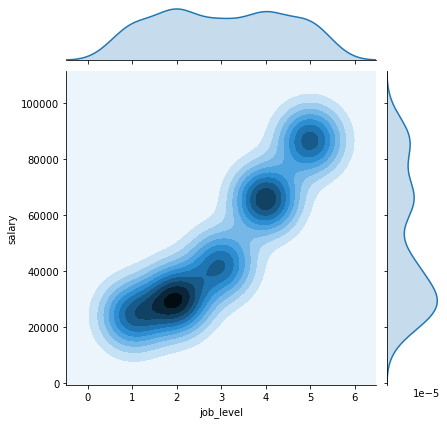

In [25]:
sns.jointplot(x="job_level", y="salary", data=satisfied_0, kind="kde")

- Jika dilihat dari persebaran data berdasarkan job level dan salary
- Menunjukan bahwa karyawan yang tidak puas banyak di dominasi oleh entry level dan salary dibawah 40000

In [26]:
age_mean_0 = satisfied_0["age"].mean()
age_median_0 = satisfied_0["age"].median()

In [28]:
print(age_mean_0)
print(age_median_0)

38.565400843881854
39.0


- Rata-rata usia karyawan yang tidak puas adalah 38 tahun

In [35]:
pd.crosstab(index=satisfied_0["job_level"], columns=satisfied_0["awards"])

awards,0,1,2,3,4,5,6,7,8,9
job_level,,,,,,,,,,
1,4,4,3,3,4,6,2,5,6,4
2,4,4,7,12,2,4,7,2,9,6
3,5,3,6,5,4,1,3,6,5,3
4,4,3,6,7,6,7,6,3,6,5
5,3,6,7,5,6,7,1,2,4,4


In [ ]:
sns.jointplot(x="", y="salary", data=satisfied_0, kind="kde")

# numerikal

### salary

In [17]:
(pd.crosstab(index=df["salary"], columns=df["satisfied"],normalize='index')*100).round(2)

satisfied,0,1
salary,,
24076,43.16,56.84
29805,51.82,48.18
42419,50.00,50.00
65715,48.18,51.82
86750,43.69,56.31


### awards

In [18]:
(pd.crosstab(index=df["awards"], columns=df["satisfied"],normalize='index')*100).round(2)

satisfied,0,1
awards,,
0,38.46,61.54
1,48.78,51.22
2,60.42,39.58
3,56.14,43.86
4,43.14,56.86
5,48.08,51.92
6,41.30,58.70
7,36.00,64.00
8,53.57,46.43


### onsite

In [19]:
(pd.crosstab(index=df["onsite"], columns=df["satisfied"],normalize='index')*100).round(2)

satisfied,0,1
onsite,,
0,48.69,51.31
1,45.92,54.08


### job level

In [20]:
(pd.crosstab(index=df["job_level"], columns=df["satisfied"],normalize='index')*100).round(2)

satisfied,0,1
job_level,,
1,43.16,56.84
2,51.82,48.18
3,50.00,50.00
4,48.18,51.82
5,43.69,56.31


# kategorikal

In [21]:
(pd.crosstab(index=df["location"], columns=df["satisfied"],normalize='index')*100).round(2)

satisfied,0,1
location,,
City,45.95,54.05
Suburb,48.96,51.04


- Karyawan yang tinggal di kota lebih puas dibanding mereka yang tinggal di pinggiran kota
- Namun, angkanya tidak terlalu signifikan

In [22]:
(pd.crosstab(index=df["education"], columns=df["satisfied"],normalize='index')*100).round(2)

satisfied,0,1
education,,
PG,46.06,53.94
UG,48.78,51.22


- Mereka yang memiliki level pendidikan Postgraduate lebih puas dibandingkan yang hanya Undergraduate
- Namun, angkanya juga tidak terlalu signifikan

In [30]:
(pd.crosstab(index=df["Dept"], columns=df["satisfied"], normalize="index")*100).round(2)

satisfied,0,1
Dept,,
HR,50.00,50.00
Marketing,53.68,46.32
Purchasing,43.12,56.88
Sales,44.57,55.43
Technology,45.92,54.08


- Departemen yang merasa puas, memiliki skor tertinggi di Purchasing dengan 56% dan terendah di Marketing dengan 46%

# Kesimpulan

- Index kepuasan karyawan hanya mencapai 52.6%, artinya hampir setengah karyawan tidak puas
- Banyak diantara mereka yang tidak puas, masih berada pada posisi entry level dan salary dibawah 40000
- Karyawan yang tidak pernah pergi bekerja ke kantor merasa tidak puas
- Banyak karyawan di tim Marketing yang merasa tidak puas
